In [7]:
# imports
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
def read_ds(csv_file, img_sz):
    df = pd.read_csv(csv_file).values
    n = df.shape[0]
    h, w = img_sz
    train_labels = df[:, 0]
    train_images = df[:, 1:].reshape((n, h, w, 1))
    return train_images, train_labels

we have 42000 records in the dataset


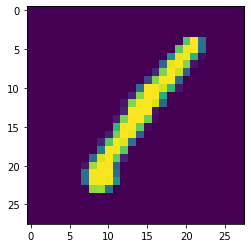

In [9]:
training_images, training_labels = read_ds('./digit-recognizer/train.csv', (28, 28))

print('we have {} records in the dataset'.format(training_labels.shape[0]))
plt.imshow(training_images[0].reshape(28, 28))
plt.show()

In [10]:
# Normalization
training_images = training_images / 255.0

In [11]:
# create the model
model = tf.keras.Sequential([
    Conv2D(64, (3,3), input_shape=(28, 28, 1)), # 26
    MaxPool2D(), # 13
    Conv2D(32, (3,3)), # 11
    MaxPool2D(),
    Flatten(),
    Dense(128, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)
])

In [15]:
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy'],
)

In [ ]:
model.fit(
    x = training_images,
    y = training_labels,
    epochs=50
)

Epoch 1/50
1313/1313 [==============================] - 33s 25ms/step - loss: 0.1651 - accuracy: 0.9486
Epoch 2/50
1313/1313 [==============================] - 34s 26ms/step - loss: 0.0508 - accuracy: 0.9846
Epoch 3/50
1313/1313 [==============================] - 33s 25ms/step - loss: 0.0345 - accuracy: 0.9888
Epoch 4/50
1313/1313 [==============================] - 33s 25ms/step - loss: 0.0266 - accuracy: 0.9917
Epoch 5/50
1313/1313 [==============================] - 32s 25ms/step - loss: 0.0205 - accuracy: 0.9932
Epoch 6/50
1313/1313 [==============================] - 32s 25ms/step - loss: 0.0177 - accuracy: 0.9942
Epoch 7/50
1313/1313 [==============================] - 33s 25ms/step - loss: 0.0142 - accuracy: 0.9950
Epoch 8/50
1313/1313 [==============================] - 33s 25ms/step - loss: 0.0133 - accuracy: 0.9955
Epoch 9/50
1313/1313 [==============================] - 33s 25ms/step - loss: 0.0117 - accuracy: 0.9961
Epoch 10/50
1313/1313 [==============================] - 33s 25m

In [18]:
# Testing
test_df = pd.read_csv('./digit-recognizer/test.csv').values
test_images = test_df.reshape((test_df.shape[0], 28, 28, 1))

out = model.predict(test_images)

print(out.shape)
print(out)


(28000, 10)
[[0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]


In [21]:
labels = np.argmax(out, axis=1)
print(labels)

[2 0 9 ... 3 9 2]


In [26]:
imageIds = np.arange(1, labels.shape[0]+1, 1)
results = np.array([imageIds, labels]).T
print(results)

[[    1     2]
 [    2     0]
 [    3     9]
 ...
 [27998     3]
 [27999     9]
 [28000     2]]


In [28]:
results_df = pd.DataFrame(results, columns=['ImageId','Label'])
print(results_df)

       ImageId  Label
0            1      2
1            2      0
2            3      9
3            4      9
4            5      3
...        ...    ...
27995    27996      9
27996    27997      7
27997    27998      3
27998    27999      9
27999    28000      2

[28000 rows x 2 columns]


In [31]:
results_df.to_csv('out.csv', index=False)